In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from IPython.display import clear_output
import torchsummary
import torch

import sys
sys.path.append('../..')

from vae import compute_fid_score
from gan import GAN
from rbm import RBM
from dbn import DBN
from load_data import load_mnist

# Load data

In [2]:
X_train, y_train, X_test, y_test = load_mnist(binarize=False)

# GAN

In [46]:
gan_model = GAN(latent_dim=200, negative_slope=0.2, h_dim_1=512, h_dim_2=784)

Epoch 39/250:: loss_disc: 1.3406, loss_gen: 1.9137, D(x): 0.0024, D(G(z)): 0.0021


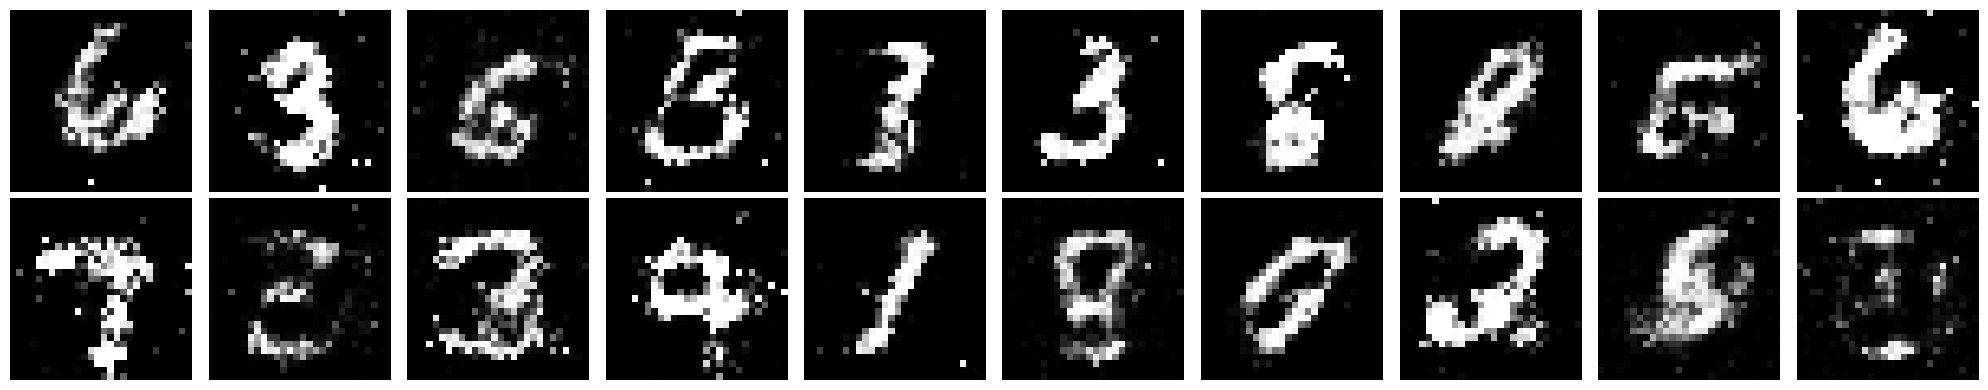

In [47]:
gan_model.train(X_train, epochs=250, learning_rate=3e-4, beta_1=0.7, batch_size=256, n_inner_disc=1, n_inner_gen=2)

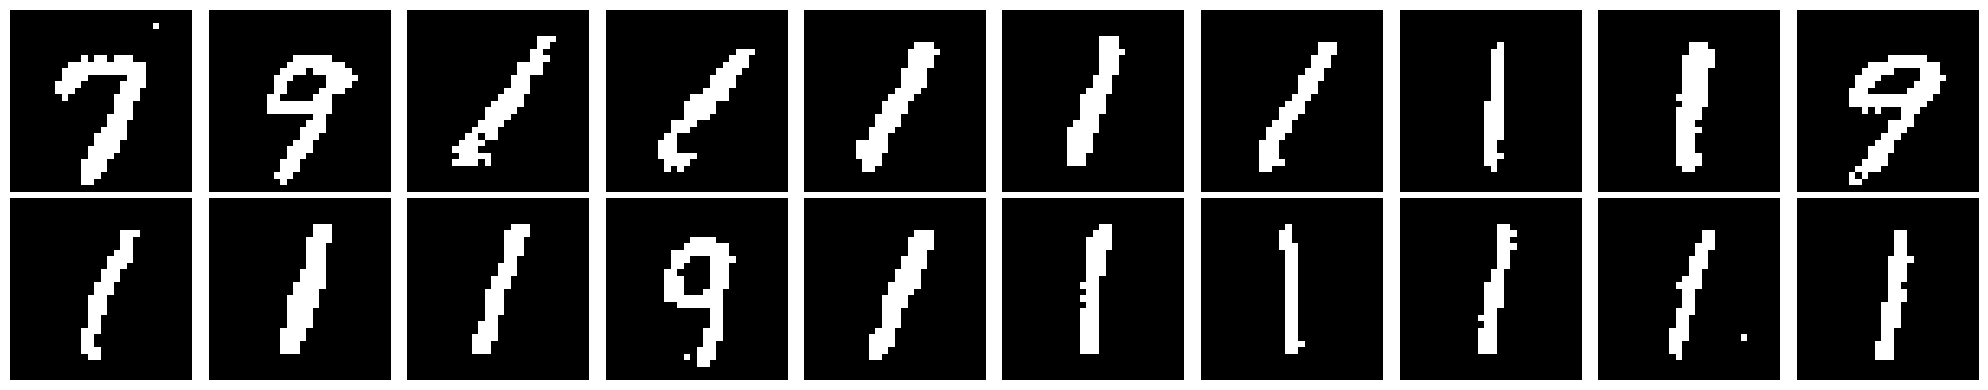

In [6]:
_= gan_model.generate_data(binarize=True)

In [44]:
gan_generated_images = gan_model.generate_data(binarize=True, nb_to_generate=5000, plot_=False).squeeze()
gan_fid_score = compute_fid_score(X_test[:5000], gan_generated_images, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(f"FID score with GAN: {gan_fid_score:.4f}")

FID score with GAN: 932.9578
